DATA COLLECTION AND EXPLORATION

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Input,Dropout
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import CategoricalNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import graphviz
import pickle
import time
import datetime
import os
%matplotlib inline

IMPORT DATASET

In [ ]:
df = pd.read_csv('./Combined1.csv')

C:\Users\DELL\AppData\Local\Temp\ipykernel_22236\237221974.py:1: DtypeWarning: Columns (0,3,5,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./Combined1.csv')


In [3]:
columns_to_skip = [1,2,4,7,87]

# Duyệt qua tất cả các cột, bỏ qua các cột với số thứ tự xác định
for i, column in enumerate(df.columns):
    if i not in columns_to_skip:
        df[column] = pd.to_numeric(df[column].astype(str).str.replace("'", ""), errors='coerce')

EDIT COLUMN NAMES

In [4]:
df = df.rename(columns=lambda x: x.strip())

In [5]:
df.head(10)

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,0.0,192.168.50.7-23.32.166.121-52380-443-6,192.168.50.7,52380.0,23.32.166.121,443.0,6.0,34:28.6,1.0,2.0,...,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,BENIGN
1,1.0,192.168.50.7-23.32.166.121-52380-443-6,23.32.166.121,443.0,192.168.50.7,52380.0,6.0,34:28.6,2.0,3.0,...,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,1.0,BENIGN
2,64469.0,192.168.50.7-23.32.166.121-52380-443-6,23.32.166.121,443.0,192.168.50.7,52380.0,6.0,34:28.6,218.0,1.0,...,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,1.0,BENIGN
3,171.0,192.168.50.253-224.0.0.5-0-0-0,192.168.50.253,0.0,224.0.0.5,0.0,0.0,34:28.7,115366430.0,52.0,...,1.073087e+00,8.0,4.0,9.613862e+06,2.884856e+05,9988327.0,9110910.0,0.0,0.0,BENIGN
4,186.0,255.255.255.255-0.0.0.0-67-68-17,0.0.0.0,68.0,255.255.255.255,67.0,17.0,34:30.0,109157387.0,16.0,...,3.774939e+06,10054849.0,2647210.0,1.015194e+07,2.795046e+06,14600796.0,6304546.0,0.0,0.0,BENIGN
5,184.0,192.168.50.254-224.0.0.5-0-0-0,192.168.50.254,0.0,224.0.0.5,0.0,0.0,34:32.7,115998008.0,45.0,...,1.237722e+06,4287600.0,4.0,9.309195e+06,1.203884e+06,9988912.0,5659882.0,0.0,0.0,BENIGN
6,185.0,8.0.6.4-8.6.0.1-0-0-0,8.6.0.1,0.0,8.0.6.4,0.0,0.0,34:33.6,74867914.0,6.0,...,0.000000e+00,2.0,2.0,3.743396e+07,2.412200e+07,54490788.0,20377122.0,0.0,0.0,BENIGN
7,194.0,192.168.50.6-74.125.28.94-58124-443-6,192.168.50.6,58124.0,74.125.28.94,443.0,6.0,34:36.6,87964914.0,48.0,...,3.795089e+02,217977.0,217218.0,2.903140e+07,1.557271e+07,46962397.0,18895963.0,0.0,0.0,BENIGN
8,169864.0,192.168.50.6-4.2.2.4-57629-53-17,192.168.50.6,57629.0,4.2.2.4,53.0,17.0,34:36.6,20823.0,2.0,...,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,BENIGN
9,41274.0,192.168.50.6-8.8.8.8-57629-53-17,192.168.50.6,57629.0,8.8.8.8,53.0,17.0,34:36.6,46885.0,2.0,...,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,BENIGN


In [6]:
df.describe()

,Unnamed: 0,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound
count,137116.000000,137116.000000,137116.000000,137116.000000,1.371160e+05,137116.00000,137116.000000,1.371160e+05,1.371160e+05,137116.000000,...,1.371160e+05,1.371160e+05,1.371160e+05,1.371160e+05,1.371160e+05,1.371160e+05,1.371160e+05,1.371160e+05,135134.0,137116.000000
mean,95761.369774,35858.029639,20548.012953,10.098048,6.575324e+06,16.32641,4.698124,4.947366e+03,3.737773e+03,205.012004,...,4.906273e+04,2.100783e+04,7.492499e+04,3.588306e+04,2.390951e+06,2.400567e+05,2.626637e+06,2.180583e+06,0.0,0.566331
std,153370.296978,24735.070389,23169.488300,5.455740,2.345377e+07,318.51021,49.366888,5.277377e+04,1.011248e+05,419.745732,...,4.424027e+05,2.177489e+05,6.061227e+05,4.031814e+05,9.823704e+06,1.902224e+06,1.048392e+07,9.474628e+06,0.0,0.495583
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000
25%,3287.000000,897.000000,80.000000,6.000000,2.000000e+00,2.00000,0.000000,1.200000e+01,0.000000e+00,6.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000
50%,12789.000000,46955.500000,8161.500000,6.000000,7.480000e+02,2.00000,1.000000,6.000000e+01,0.000000e+00,31.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,1.000000
75%,124754.750000,57514.000000,42979.000000,17.000000,4.579800e+04,4.00000,2.000000,8.020000e+02,9.200000e+01,383.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,1.000000
max,802795.000000,65534.000000,65533.000000,17.000000,1.200000e+08,85894.00000,8029.000000,1.526642e+07,1.289243e+07,32120.000000,...,4.050800e+07,2.853681e+07,6.783473e+07,4.050800e+07,1.192194e+08,6.961402e+07,1.192194e+08,1.192194e+08,0.0,1.000000


In [7]:
total_rows = len(df)
print("Tổng số hàng trong dataset là:", total_rows)

Tổng số hàng trong dataset là: 137139


In [8]:
print("columns: ", len(df.columns))
df.columns

columns:  88


Index(['Unnamed: 0', 'Flow ID', 'Source IP', 'Source Port', 'Destination IP',
       'Destination Port', 'Protocol', 'Timestamp', 'Flow Duration',
       'Total Fwd Packets', 'Total Backward Packets',
       'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Le

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137139 entries, 0 to 137138
Data columns (total 88 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   137116 non-null  float64
 1   Flow ID                      137139 non-null  object 
 2   Source IP                    137139 non-null  object 
 3   Source Port                  137116 non-null  float64
 4   Destination IP               137139 non-null  object 
 5   Destination Port             137116 non-null  float64
 6   Protocol                     137116 non-null  float64
 7   Timestamp                    137139 non-null  object 
 8   Flow Duration                137116 non-null  float64
 9   Total Fwd Packets            137116 non-null  float64
 10  Total Backward Packets       137116 non-null  float64
 11  Total Length of Fwd Packets  137116 non-null  float64
 12  Total Length of Bwd Packets  137116 non-null  float64
 13 

In [10]:
zero_counts = (df == 0).sum()

total_counts = df.count()

condition = zero_counts / total_counts >= 0.9

columns_with_80_percent_zeros = zero_counts[condition].index
print(columns_with_80_percent_zeros)

Index(['Bwd Packet Length Std', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'FIN Flag Count', 'SYN Flag Count',
       'RST Flag Count', 'PSH Flag Count', 'ECE Flag Count',
       'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate',
       'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate',
       'Active Mean', 'Active Std', 'Active Max', 'Active Min', 'Idle Mean',
       'Idle Std', 'Idle Max', 'Idle Min', 'SimillarHTTP'],
      dtype='object')


FEATURE SELECTION

In [11]:
df=df.drop('Bwd PSH Flags',axis=1)
df=df.drop('Fwd URG Flags',axis=1)
df=df.drop('Bwd URG Flags',axis=1)
df=df.drop('FIN Flag Count',axis=1)
df=df.drop('PSH Flag Count',axis=1)
df=df.drop('ECE Flag Count',axis=1)
df=df.drop('Fwd Avg Bytes/Bulk',axis=1)
df=df.drop('Fwd Avg Packets/Bulk',axis=1)
df=df.drop('Fwd Avg Bulk Rate',axis=1)
df=df.drop('Bwd Avg Bytes/Bulk',axis=1)
df=df.drop('Bwd Avg Packets/Bulk',axis=1)
df=df.drop('Bwd Avg Bulk Rate',axis=1)
df=df.drop('Unnamed: 0',axis=1)
df=df.drop('SimillarHTTP', axis=1)
df=df.drop('Flow ID', axis=1)
df=df.drop('Timestamp', axis=1)
df=df.drop('Source IP',axis=1)
df=df.drop('Flow Duration',axis=1)
df=df.drop('Total Fwd Packets',axis=1)
df=df.drop('Total Backward Packets',axis=1)
df=df.drop('Total Length of Bwd Packets',axis=1)
df=df.drop('Fwd Packet Length Std',axis=1)
df=df.drop('Flow IAT Max',axis=1)
df=df.drop('Flow IAT Min',axis=1)
df=df.drop('Fwd IAT Total',axis=1)
df=df.drop('Fwd IAT Max',axis=1)
df=df.drop('Fwd IAT Min',axis=1)
df=df.drop('Bwd IAT Total',axis=1)
df=df.drop('Bwd IAT Mean',axis=1)
df=df.drop('Bwd IAT Std',axis=1)
df=df.drop('Bwd IAT Max',axis=1)
df=df.drop('Bwd IAT Min',axis=1)
df=df.drop('Fwd Header Length',axis=1)
df=df.drop('Bwd Header Length',axis=1)
df=df.drop('Bwd Packets/s',axis=1)
df=df.drop('SYN Flag Count',axis=1)
df=df.drop('Down/Up Ratio',axis=1)
df=df.drop('Fwd Header Length.1',axis=1)
df=df.drop('Subflow Fwd Packets',axis=1)
df=df.drop('Subflow Bwd Packets',axis=1)
df=df.drop('Subflow Bwd Bytes',axis=1)
df=df.drop('act_data_pkt_fwd',axis=1)
df=df.drop('min_seg_size_forward',axis=1)
df=df.drop('Active Mean',axis=1)
df=df.drop('Active Std',axis=1)
df=df.drop('Active Max',axis=1)
df=df.drop('Active Min',axis=1)
df=df.drop('Idle Mean',axis=1)
df=df.drop('Idle Max',axis=1)
df=df.drop('Idle Min',axis=1)
df=df.drop('Packet Length Std',axis=1)
df=df.drop('Inbound',axis=1)

In [12]:
df.isnull().sum()

Source Port                     23
Destination IP                   0
Destination Port                23
Protocol                        23
Total Length of Fwd Packets     23
Fwd Packet Length Max           23
Fwd Packet Length Min           23
Fwd Packet Length Mean          23
Bwd Packet Length Max           23
Bwd Packet Length Min           23
Bwd Packet Length Mean          23
Bwd Packet Length Std           23
Flow Bytes/s                   926
Flow Packets/s                  23
Flow IAT Mean                   23
Flow IAT Std                    23
Fwd IAT Mean                    23
Fwd IAT Std                     23
Fwd PSH Flags                   23
Fwd Packets/s                   23
Min Packet Length               23
Max Packet Length               23
Packet Length Mean              23
Packet Length Variance          23
RST Flag Count                  23
ACK Flag Count                  23
URG Flag Count                  23
CWE Flag Count                  23
Average Packet Size 

CHECK NULL & NaN VALUES

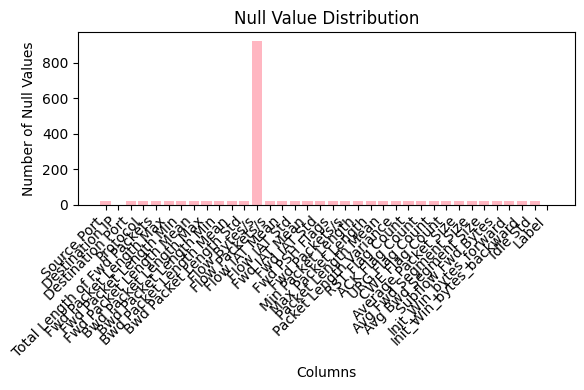

In [13]:
null_counts = df.isnull().sum()

plt.figure(figsize=(6, 4))
plt.bar(null_counts.index, null_counts.values,color = 'lightpink')

plt.xlabel('Columns')
plt.ylabel('Number of Null Values')
plt.title('Null Value Distribution')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [14]:
df.dropna(inplace=True)

In [15]:
df.isnull().sum()

Source Port                    0
Destination IP                 0
Destination Port               0
Protocol                       0
Total Length of Fwd Packets    0
Fwd Packet Length Max          0
Fwd Packet Length Min          0
Fwd Packet Length Mean         0
Bwd Packet Length Max          0
Bwd Packet Length Min          0
Bwd Packet Length Mean         0
Bwd Packet Length Std          0
Flow Bytes/s                   0
Flow Packets/s                 0
Flow IAT Mean                  0
Flow IAT Std                   0
Fwd IAT Mean                   0
Fwd IAT Std                    0
Fwd PSH Flags                  0
Fwd Packets/s                  0
Min Packet Length              0
Max Packet Length              0
Packet Length Mean             0
Packet Length Variance         0
RST Flag Count                 0
ACK Flag Count                 0
URG Flag Count                 0
CWE Flag Count                 0
Average Packet Size            0
Avg Fwd Segment Size           0
Avg Bwd Se

In [16]:
df.Label.unique()

array(['BENIGN', 'TFTP', 'DrDoS_DNS', 'DrDoS_LDAP', 'DrDoS_MSSQL',
       'DrDoS_NetBIOS', 'DrDoS_NTP', 'DrDoS_SNMP', 'DrDoS_SSDP',
       'DrDoS_UDP', 'UDP-lag', 'WebDDoS', 'Syn'], dtype=object)

In [17]:
value_counts = df['Label'].value_counts()
print(value_counts)

Label
BENIGN           71688
Syn              27418
DrDoS_NTP        14500
TFTP              5261
UDP-lag           3800
DrDoS_DNS         3400
DrDoS_UDP         2160
DrDoS_MSSQL       2000
DrDoS_NetBIOS     1706
DrDoS_LDAP        1600
DrDoS_SNMP        1510
DrDoS_SSDP         770
WebDDoS            400
Name: count, dtype: int64


DATA ANALYSIS

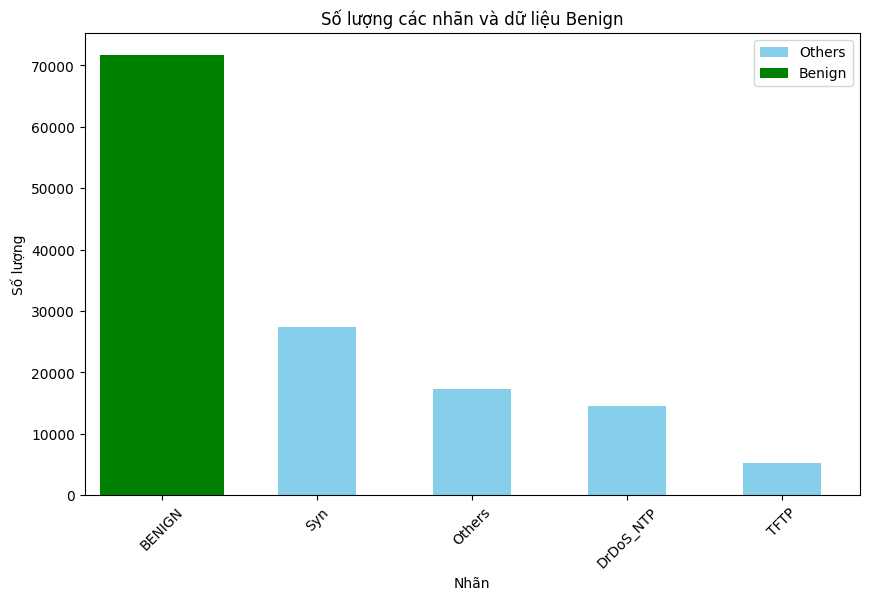

In [18]:
label_counts = df['Label'].value_counts()

threshold = 0.03
small_labels = label_counts[label_counts / label_counts.sum() < threshold].index
df['Label'] = df['Label'].apply(lambda x: 'Others' if x in small_labels else x)

label_counts = df['Label'].value_counts()

benign_count = label_counts['BENIGN']

plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar', color='skyblue')
plt.bar('Benign', benign_count, color='green')
plt.legend(['Others', 'Benign'])
plt.title('Số lượng các nhãn và dữ liệu Benign')
plt.xlabel('Nhãn')
plt.ylabel('Số lượng')
plt.xticks(rotation=45)
plt.show()

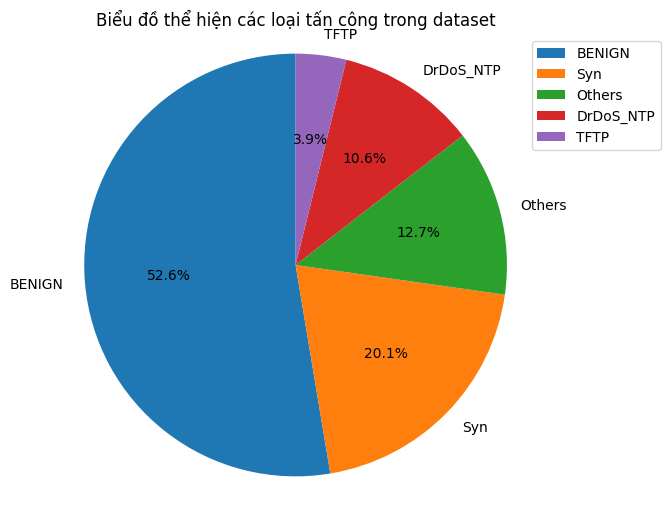

In [19]:
label_counts = df['Label'].value_counts()

threshold = 0.03
small_labels = label_counts[label_counts/label_counts.sum() < threshold].index
df['Label'] = df['Label'].apply(lambda x: 'Others' if x in small_labels else x)

label_counts = df['Label'].value_counts()

labels = label_counts.index.tolist()
sizes = label_counts.values.tolist()

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Biểu đồ thể hiện các loại tấn công trong dataset')
plt.axis('equal')

plt.legend(labels, loc="upper right",bbox_to_anchor=(1.3, 1))
plt.show()

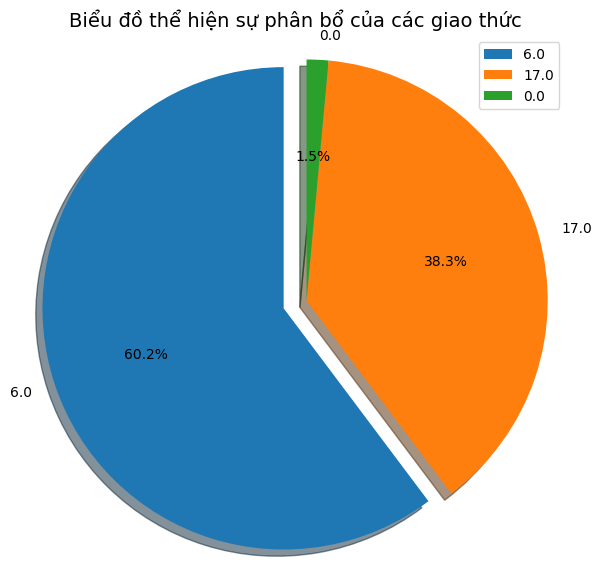

In [20]:
protocol_counts = df['Protocol'].value_counts()
protocol_percentage = protocol_counts / protocol_counts.sum() * 100

fig1, ax1 = plt.subplots(figsize=[7,7])
ax1.pie(protocol_percentage, explode=(0.1, 0, 0), labels=protocol_percentage.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
ax1.legend(protocol_percentage.index, loc="best")
plt.title('Biểu đồ thể hiện sự phân bổ của các giao thức', fontsize=14)
plt.show()

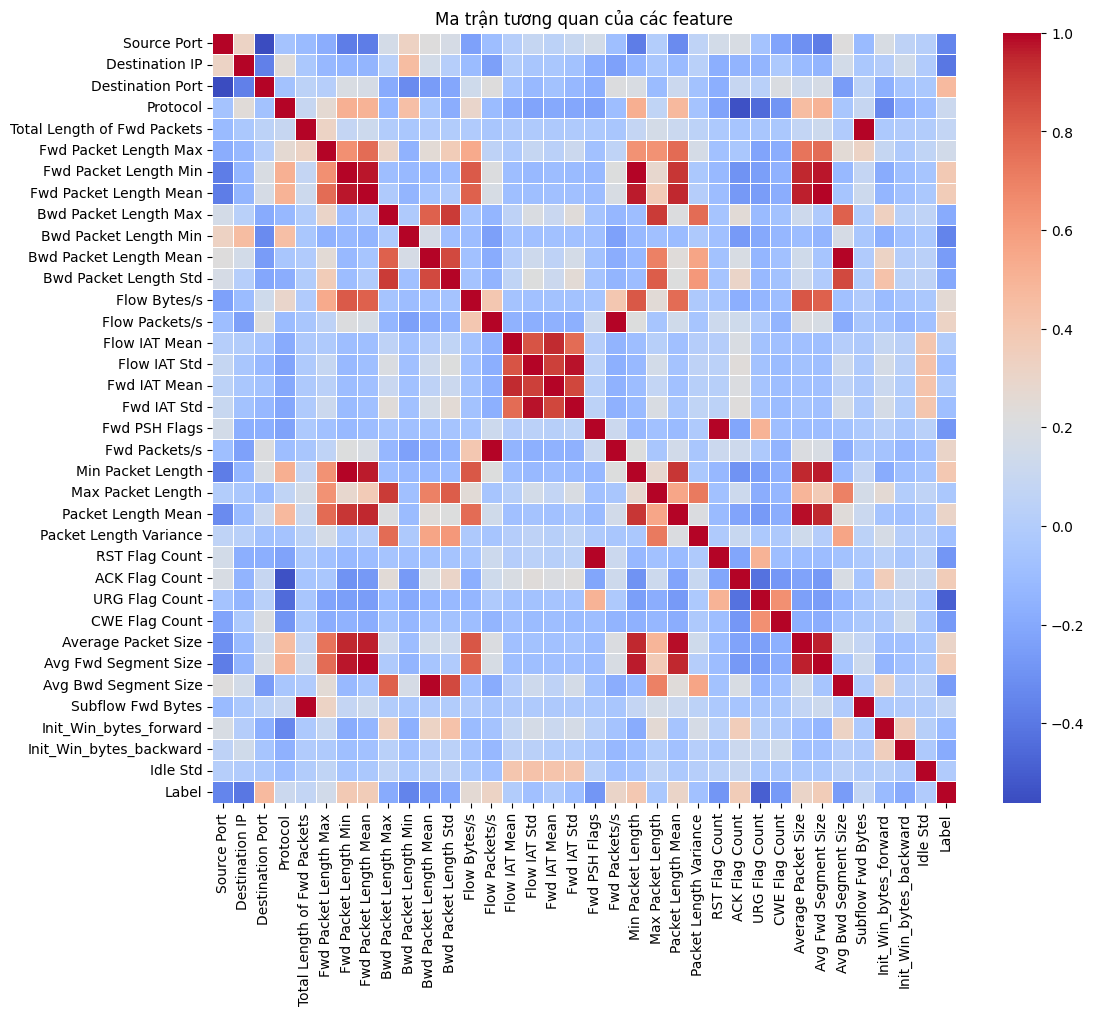

In [31]:
import seaborn as sns

correlation_matrix = df.corr()

plt.figure(figsize=[12,10])
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Ma trận tương quan của các feature')
plt.show()

LABEL ENDCODING

In [22]:
df['Label'] = np.where(df['Label'] == 'BENIGN', 0, 1)
df['Label'] = df['Label'].astype('int')

In [23]:
df.Label.unique()

array([0, 1])

In [25]:
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
print("The number of categorical features is",len(categorical_features),"and they are : \n",categorical_features)

The number of categorical features is 1 and they are : 
 ['Destination IP']


In [26]:
num_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
num_features, len(num_features)

(['Source Port',
  'Destination Port',
  'Protocol',
  'Total Length of Fwd Packets',
  'Fwd Packet Length Max',
  'Fwd Packet Length Min',
  'Fwd Packet Length Mean',
  'Bwd Packet Length Max',
  'Bwd Packet Length Min',
  'Bwd Packet Length Mean',
  'Bwd Packet Length Std',
  'Flow Bytes/s',
  'Flow Packets/s',
  'Flow IAT Mean',
  'Flow IAT Std',
  'Fwd IAT Mean',
  'Fwd IAT Std',
  'Fwd PSH Flags',
  'Fwd Packets/s',
  'Min Packet Length',
  'Max Packet Length',
  'Packet Length Mean',
  'Packet Length Variance',
  'RST Flag Count',
  'ACK Flag Count',
  'URG Flag Count',
  'CWE Flag Count',
  'Average Packet Size',
  'Avg Fwd Segment Size',
  'Avg Bwd Segment Size',
  'Subflow Fwd Bytes',
  'Init_Win_bytes_forward',
  'Init_Win_bytes_backward',
  'Idle Std',
  'Label'],
 35)

In [27]:
df[num_features].nunique(axis=0)

Source Port                    36712
Destination Port               41379
Protocol                           3
Total Length of Fwd Packets     4430
Fwd Packet Length Max           1996
Fwd Packet Length Min            632
Fwd Packet Length Mean          6870
Bwd Packet Length Max            993
Bwd Packet Length Min            201
Bwd Packet Length Mean          5971
Bwd Packet Length Std           6172
Flow Bytes/s                   59983
Flow Packets/s                 52994
Flow IAT Mean                  52621
Flow IAT Std                   59775
Fwd IAT Mean                   37200
Fwd IAT Std                    40196
Fwd PSH Flags                      2
Fwd Packets/s                  52715
Min Packet Length                603
Max Packet Length               1841
Packet Length Mean              9065
Packet Length Variance          8840
RST Flag Count                     2
ACK Flag Count                     2
URG Flag Count                     2
CWE Flag Count                     2
A

In [28]:
discrete_feature = [feature for feature in num_features if df[feature].nunique()<=15 and feature != 'label']
print("The number of discrete features is",len(discrete_feature),"and they are : \n",discrete_feature)

The number of discrete features is 7 and they are : 
 ['Protocol', 'Fwd PSH Flags', 'RST Flag Count', 'ACK Flag Count', 'URG Flag Count', 'CWE Flag Count', 'Label']


In [29]:
from sklearn.preprocessing import LabelEncoder
def LabelEncoding(data):
    columnsToEncode = list(data.select_dtypes(include=['category', 'object']))
    le = LabelEncoder()
    for feature in columnsToEncode:
        try:
            data[feature] = le.fit_transform(data[feature])
        except:
            print ('error' + feature)
    return data

In [30]:
df = LabelEncoding(df)

OUTLIER HANDLING

In [32]:
is_inf = np.isinf(df)
for column in is_inf.columns:
    if is_inf[column].any():
        print(f"Có giá trị vô cùng trong cột '{column}'")

Có giá trị vô cùng trong cột 'Flow Bytes/s'
Có giá trị vô cùng trong cột 'Flow Packets/s'


In [33]:
is_large = np.abs(df) > 1e9
for column in is_large.columns:
    if is_large[column].any():
        print(f"Có giá trị quá lớn trong cột '{column}'")

Có giá trị quá lớn trong cột 'Flow Bytes/s'
Có giá trị quá lớn trong cột 'Flow Packets/s'


In [34]:
df[is_inf] = np.nan
df[is_large] = np.nan
nan_columns = df.columns[df.isna().any()].tolist()
print("Các cột chứa giá trị NaN:", nan_columns)
df = df.dropna(subset=nan_columns)

Các cột chứa giá trị NaN: ['Flow Bytes/s', 'Flow Packets/s']


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128649 entries, 0 to 137138
Data columns (total 36 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Source Port                  128649 non-null  float64
 1   Destination IP               128649 non-null  int64  
 2   Destination Port             128649 non-null  float64
 3   Protocol                     128649 non-null  float64
 4   Total Length of Fwd Packets  128649 non-null  float64
 5   Fwd Packet Length Max        128649 non-null  float64
 6   Fwd Packet Length Min        128649 non-null  float64
 7   Fwd Packet Length Mean       128649 non-null  float64
 8   Bwd Packet Length Max        128649 non-null  float64
 9   Bwd Packet Length Min        128649 non-null  float64
 10  Bwd Packet Length Mean       128649 non-null  float64
 11  Bwd Packet Length Std        128649 non-null  float64
 12  Flow Bytes/s                 128649 non-null  float64
 13  Flow

DATA SPLITTING

In [36]:
X = df.drop(['Label'], axis=1)
Y = df['Label']

In [37]:
ms = MinMaxScaler()
X = ms.fit_transform(X)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.3)
print(X_train.shape, X_test.shape)

(90054, 35) (38595, 35)


MODEL TRAINING

In [60]:
model = keras.Sequential()
model.add(Input(shape=(35,)))
model.add(Dense(35,name = "Input_Layer"))
model.add(Dense(22 , activation="relu" , name="Hidden_Layer_1"))
model.add(Dropout(0.5, name="Dropout_Layer"))
model.add(Dense(22 , activation="relu" , name="Hidden_Layer_2"))
model.add(Dense(1 , activation="sigmoid" , name="Output_Layer"))
opt = keras.optimizers.Adam(learning_rate=0.0015)
model.compile( optimizer=opt, loss="binary_crossentropy", metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (Dense)         (None, 35)                1260      
                                                                 
 Hidden_Layer_1 (Dense)      (None, 22)                792       
                                                                 
 Dropout_Layer (Dropout)     (None, 22)                0         
                                                                 
 Hidden_Layer_2 (Dense)      (None, 22)                506       
                                                                 
 Output_Layer (Dense)        (None, 1)                 23        
                                                                 
Total params: 2581 (10.08 KB)
Trainable params: 2581 (10.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [61]:
from timeit import default_timer as timer
start_time = timer()
history_org = model.fit(
    X_train,
    y_train,
    batch_size=128,
    epochs=50, verbose=2,
    callbacks=None,
    validation_data=(X_test,y_test),
    shuffle=True,
    class_weight=None,
    sample_weight=None,
    initial_epoch=0)
end_time = timer()
time_taken = end_time - start_time
predictions = model.predict(X_test)
loss, accuracy = model.evaluate(X_test,y_test)
hostile = 0
safe = 0
for check in predictions:
    if check  > 0.5:
        hostile += 1
    else:
        safe += 1
print("Safe Packets: ", safe)
print("Hostile Packets: ", hostile)
print("Time Taken:", time_taken)
print("Validation Loss: ",loss)
print("Accuracy: ",accuracy)

Epoch 1/50
704/704 - 3s - loss: 0.1398 - accuracy: 0.9494 - val_loss: 0.0530 - val_accuracy: 0.9742 - 3s/epoch - 4ms/step
Epoch 2/50
704/704 - 2s - loss: 0.0573 - accuracy: 0.9765 - val_loss: 0.0332 - val_accuracy: 0.9911 - 2s/epoch - 3ms/step
Epoch 3/50
704/704 - 2s - loss: 0.0446 - accuracy: 0.9826 - val_loss: 0.0260 - val_accuracy: 0.9926 - 2s/epoch - 2ms/step
Epoch 4/50
704/704 - 2s - loss: 0.0389 - accuracy: 0.9853 - val_loss: 0.0244 - val_accuracy: 0.9933 - 2s/epoch - 3ms/step
Epoch 5/50
704/704 - 2s - loss: 0.0345 - accuracy: 0.9871 - val_loss: 0.0249 - val_accuracy: 0.9905 - 2s/epoch - 3ms/step
Epoch 6/50
704/704 - 3s - loss: 0.0323 - accuracy: 0.9881 - val_loss: 0.0228 - val_accuracy: 0.9925 - 3s/epoch - 4ms/step
Epoch 7/50
704/704 - 2s - loss: 0.0306 - accuracy: 0.9888 - val_loss: 0.0165 - val_accuracy: 0.9942 - 2s/epoch - 3ms/step
Epoch 8/50
704/704 - 2s - loss: 0.0279 - accuracy: 0.9899 - val_loss: 0.0173 - val_accuracy: 0.9945 - 2s/epoch - 3ms/step
Epoch 9/50
704/704 - 2s 

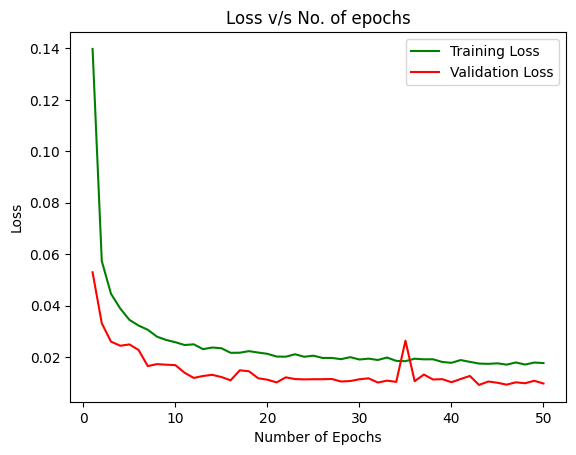

In [62]:
loss = history_org.history['loss']
val_loss = history_org.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g', label = 'Training Loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
plt.title('Loss v/s No. of epochs')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

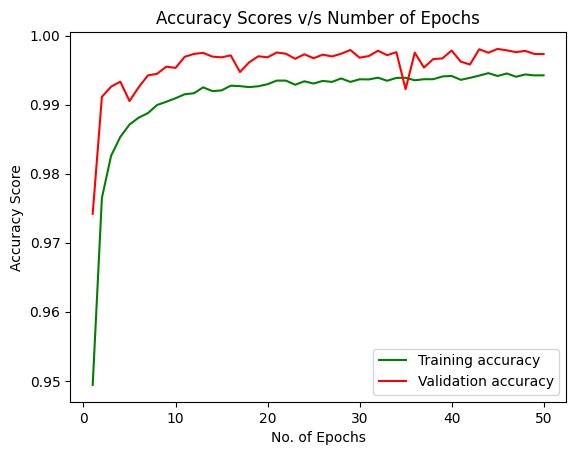

In [63]:
loss = history_org.history['accuracy']
val_loss = history_org.history['val_accuracy']
plt.plot(epochs, loss, 'g', label = 'Training accuracy')
plt.plot(epochs, val_loss, 'r', label = 'Validation accuracy')
plt.title('Accuracy Scores v/s Number of Epochs')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

In [55]:
target_label = (predictions >0.5).astype(int)

CONFUSION MATRIX

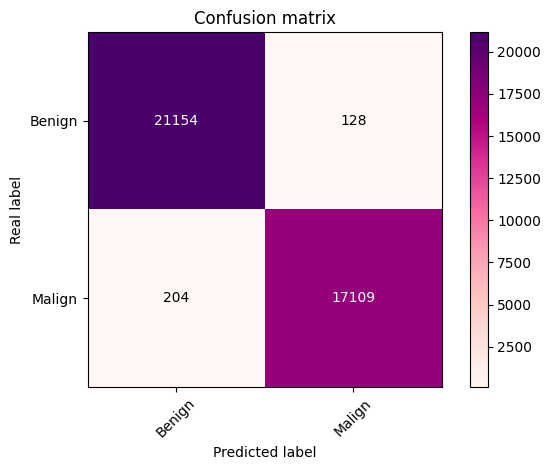

In [56]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Example confusion matrix
# Replace this with your actual confusion matrix
cm = confusion_matrix(y_test,target_label)
# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.RdPu)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Benign', 'Malign'], rotation=45)
plt.yticks(tick_marks, ['Benign', 'Malign'])

plt.ylabel('Real label')
plt.xlabel('Predicted label')
plt.grid(False)  # Xóa đường kẻ
# Add text annotations
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             ha="center", va="center",
             color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.show()

In [45]:
from sklearn.metrics import classification_report
print ("Classification Report: ", "\n",  classification_report(y_test,target_label,digits = 6))

Classification Report:  
               precision    recall  f1-score   support

           0   0.972596  0.998919  0.985582     21282
           1   0.998626  0.965402  0.981733     17313

    accuracy                       0.983884     38595
   macro avg   0.985611  0.982160  0.983657     38595
weighted avg   0.984272  0.983884  0.983855     38595



In [ ]:
mlp_save = input("Save model? (y/n) ")
if mlp_save == 'y':
    named = input('Named model: ')
    model.save(named)

Save model? (y/n) y
Named model: test1.keras


LIVEANN

In [ ]:
def processingData(df):
    #Sửa cột Flow Bytes/s thành float
    df['Flow Bytes/s'] = df['Flow Bytes/s'].astype('float')
    #Xóa các cột có giá trị NULL nếu có
    df.isnull().sum()
    df.dropna(inplace=True)
    #Xóa các cột có giá trị quá lớn hoặc INF
    is_inf = np.isinf(df)
    is_large = np.abs(df) > 1e10
    df[is_inf] = np.nan  # Thay thế các giá trị vô cùng bằng NaN
    df[is_large] = np.nan  # Thay thế các giá trị quá lớn bằng NaN
    # Loại bỏ các giá trị NaN
    nan_columns = df.columns[df.isna().any()].tolist()
    #print("Các cột chứa giá trị NaN:", nan_columns)
    df = df.dropna(subset=nan_columns)
    return df

In [ ]:
def getRecentFile(directory, return_full_path=True):
    # Lấy danh sách tất cả các file trong thư mục
    files = [os.path.join(directory, f) for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]

    # Kiểm tra xem có file nào trong thư mục không
    if not files:
        return None

    # Tìm file có thời gian chỉnh sửa gần nhất
    most_recently_modified_file = max(files, key=os.path.getmtime)

    if return_full_path:
        return most_recently_modified_file
    else:
        return os.path.basename(most_recently_modified_file)

In [ ]:
def dropColumns(df):
    #Xóa dấu cách các cột (nếu có)
    df = df.rename(columns=lambda x: x.strip())
    #Lựa chọn đặc trưng
    df=df.drop('Bwd PSH Flags',axis=1)
    df=df.drop('Fwd URG Flags',axis=1)
    df=df.drop('Bwd URG Flags',axis=1)
    df=df.drop('FIN Flag Count',axis=1)
    df=df.drop('PSH Flag Count',axis=1)
    df=df.drop('ECE Flag Count',axis=1)
    df=df.drop('Fwd Avg Bytes/Bulk',axis=1)
    df=df.drop('Fwd Avg Packets/Bulk',axis=1)
    df=df.drop('Fwd Avg Bulk Rate',axis=1)
    df=df.drop('Bwd Avg Bytes/Bulk',axis=1)
    df=df.drop('Bwd Avg Packets/Bulk',axis=1)
    df=df.drop('Bwd Avg Bulk Rate',axis=1)
    df=df.drop('Flow ID', axis=1)
    df=df.drop('Timestamp', axis=1)
    df=df.drop('Source IP',axis=1)
    df=df.drop('Flow Duration',axis=1)
    df=df.drop('Total Fwd Packets',axis=1)
    df=df.drop('Total Backward Packets',axis=1)
    df=df.drop('Total Length of Bwd Packets',axis=1)
    df=df.drop('Fwd Packet Length Std',axis=1)
    df=df.drop('Flow IAT Max',axis=1)
    df=df.drop('Flow IAT Min',axis=1)
    df=df.drop('Fwd IAT Total',axis=1)
    df=df.drop('Fwd IAT Max',axis=1)
    df=df.drop('Fwd IAT Min',axis=1)
    df=df.drop('Bwd IAT Total',axis=1)
    df=df.drop('Bwd IAT Mean',axis=1)
    df=df.drop('Bwd IAT Std',axis=1)
    df=df.drop('Bwd IAT Max',axis=1)
    df=df.drop('Bwd IAT Min',axis=1)
    df=df.drop('Fwd Header Length',axis=1)
    df=df.drop('Bwd Header Length',axis=1)
    df=df.drop('Bwd Packets/s',axis=1)
    df=df.drop('SYN Flag Count',axis=1)
    df=df.drop('Down/Up Ratio',axis=1)
    df=df.drop('Subflow Fwd Packets',axis=1)
    df=df.drop('Subflow Bwd Packets',axis=1)
    df=df.drop('Subflow Bwd Bytes',axis=1)
    df=df.drop('act_data_pkt_fwd',axis=1)
    df=df.drop('min_seg_size_forward',axis=1)
    df=df.drop('Active Mean',axis=1)
    df=df.drop('Active Std',axis=1)
    df=df.drop('Active Max',axis=1)
    df=df.drop('Active Min',axis=1)
    df=df.drop('Idle Mean',axis=1)
    df=df.drop('Idle Max',axis=1)
    df=df.drop('Idle Min',axis=1)
    df=df.drop('Packet Length Std',axis=1)
    return df

In [ ]:
def read_new_lines(directory,last_position):
    #Mở file csv từ đường dẫn
    with open(directory, 'r') as file:
        # Di chuyển con trỏ tới vị trí cuối cùng đã đọc
        file.seek(last_position)

        # Đọc các dòng mới
        lines = file.readlines()

        # Cập nhật vị trí cuối cùng đã đọc
        new_position = file.tell()

    return lines, new_position

In [ ]:
def process_lines(lines):
    df = None
    if lines:
        # Chuyển các dòng thành DataFrame
        from io import StringIO
        data = ''.join(lines)
        df = pd.read_csv(StringIO(data))
    return df

In [ ]:
def predictFlowByMLP(modelname):
    mlp_live_iteration = 0
    hostile = 0 # Đếm số lượng hostile flow mà model đã dự đoán được
    safe = 0 #Đếm số lượng safe flow mà model đã dự đoán
    start = time.time() #Biến điều kiện ghi vào file log.txt trạng thái của flow sau 20s
    stop = False #Điều kiện dừng vòng lặp while
    last_position = 0 #Vị trí cuối cùng con trỏ trỏ đến trong file csv (ban đầu là 0)
    directory_path = 'D:\\ANN project\\cicflow4.0\\CICFlowmeter\\bin\\data\\daily\\' #Đường dẫn đến folder chứa file csv
    directory = getRecentFile(directory_path, return_full_path=True) #lấy ra file được chỉnh sửa hoặc tạo mới nhất
    while not stop:
        line, last_position = read_new_lines(directory, last_position) #Lấy ra dòng mới đọc và vị trí cuối cùng con trỏ trỏ đến trong file csv
        if (line == [] or line == None): #Kiểm tra xem line đã đọc hết dòng trong file csv chưa (csv dừng cập nhật dòng mới)
            print('Finish!')
            #stop = True
            return mlp_live_iteration
        else:
            df = process_lines(line) #Biến các dòng dữ liệu đã đọc thành DataFrame
            #Rename cột để đồng bộ features với Model
            new_col = ['Flow ID', 'Source IP', 'Source Port', 'Destination IP',
            'Destination Port', 'Protocol', 'Timestamp', 'Flow Duration',
            'Total Fwd Packets', 'Total Backward Packets',
            'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
            'Fwd Packet Length Max', 'Fwd Packet Length Min',
            'Fwd Packet Length Mean', 'Fwd Packet Length Std',
            'Bwd Packet Length Max', 'Bwd Packet Length Min',
            'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
            'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
            'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
            'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
            'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
            'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
            'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
            'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
            'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
            'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count',
            'URG Flag Count', 'CWE Flag Count', 'ECE Flag Count', 'Down/Up Ratio',
            'Average Packet Size', 'Avg Fwd Segment Size', 'Avg Bwd Segment Size',
            'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk',
            'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk',
            'Bwd Avg Bulk Rate', 'Subflow Fwd Packets', 'Subflow Fwd Bytes',
            'Subflow Bwd Packets', 'Subflow Bwd Bytes', 'Init_Win_bytes_forward',
            'Init_Win_bytes_backward', 'act_data_pkt_fwd', 'min_seg_size_forward',
            'Active Mean', 'Active Std', 'Active Max', 'Active Min', 'Idle Mean',
            'Idle Std', 'Idle Max', 'Idle Min', 'Label']
            df.columns = new_col
            df = dropColumns(df) #Xóa cột không cần thiết (Feature Selection)
            df = LabelEncoding(df) #Mã hóa cột cate và obj
            df = processingData(df) #Xử lí dữ liệu trước khi dự đoán
            X = df.drop('Label', axis = 1) # Lấy ra bộ dữ liệu X để dự đoán
            from keras.models import load_model
            model = keras.models.load_model(modelname) # Load Model
            model.compile( optimizer=opt, loss="binary_crossentropy", metrics=['accuracy'])
            predictions = model.predict(X) #Dự đoán X
            #Đếm số safe và hostile flow
            for check in predictions:
                if check == 1: # change to 0 to force ddos attack
                    hostile += 1
                else:
                    safe += 1
            print("Safe Flows: ", safe)
            print("Possible Hostile Flows: ", hostile)
            print("Percentage of Hostile Flows: ", 100 * hostile/(safe + hostile))
            print ("\n")
            mlp_live_iteration += 1
            if (time.time() - start > 60):
                if (hostile/(safe + hostile) > 0.45):
                        testwrite = open('log.txt', 'a+')
                        testwrite.write('Attack Detected at: ')
                        testwrite.write(datetime.datetime.now().strftime("%Y-%m-%d %H:%M"))
                        testwrite.write('\n')
                        testwrite.write('Flows collected: ')
                        testwrite.write(str(safe + hostile))
                        testwrite.write('\n')
                        return ("Attack")
                else:
                    testwrite = open('log.txt', 'a+')
                    testwrite.write('Normal Activity Detected at: ')
                    testwrite.write(datetime.datetime.now().strftime("%Y-%m-%d %H:%M"))
                    testwrite.write('\n')
                    testwrite.write('Flows collected: ')
                    testwrite.write(str(safe + hostile))
                    testwrite.write('\n \n')
                    return mlp_live_iteration
            time.sleep(20)

In [ ]:
def main():
    live = True
    select = input('Selection (0 or 1): ')
    if (select == "1"):
        modelname = input("Please enter model: ")
        while live:
            result = predictFlowByMLP(modelname)
            if result == "Attack": #if an attack had been detectedm then print date and time of the attack
                live = False
                print("DDoS ATTACK DETECTED! @ ", datetime.datetime.now().strftime("%Y-%m-%d %H:%M"))
                #predictFlowByMLP(modelname) == 0
            elif result == 1:
                live = False
            else:
                time.sleep(10)
main()

Selection (0 or 1): 1
Please enter model: test1.keras
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Safe Flows:  54
Possible Hostile Flows:  98
Percentage of Hostile Flows:  64.47368421052632


Finish!
